In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [3]:
#Reading the dataset
df=pd.read_csv('dataset.csv')
#Display first 5 values of the data
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [4]:
#Displaying the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
#Shape of the data
df.shape

(344, 7)

In [6]:
#Checking for missing values
df.isnull().sum()

species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

In [7]:
#Taking the columns with numerical
num_columns=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']

In [8]:
#Cleaning the dataset
#Fill missing numerical values with their group medians
for col in num_columns:
    df[col] = df.groupby(['species', 'sex'])[col].transform(lambda x: x.fillna(x.median()))

    df[col] = df[col].fillna(df[col].median())

#Fill missing values with mode
df['sex'] = df.groupby('species')['sex'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown")
)

In [9]:
#Verifying missing values have been handled
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [10]:
#Checking for incorrect data
incorrect_values = {col: df[df[col] <= 0][col].count() for col in num_columns}
print("\nIncorrect Values (Negative or Zero):", incorrect_values)


Incorrect Values (Negative or Zero): {'bill_length_mm': np.int64(0), 'bill_depth_mm': np.int64(0), 'flipper_length_mm': np.int64(0), 'body_mass_g': np.int64(0)}


In [11]:
#Descriptive statistics of the given penguin datset
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.983430,17.178198,200.671512,4266.206395
std,5.353958,1.918429,13.749517,1107.288041
min,32.100000,13.100000,172.000000,2700.000000
25%,39.575000,15.700000,190.000000,3593.750000
50%,44.700000,17.300000,197.000000,4050.000000
75%,48.400000,18.600000,212.000000,4750.000000
max,59.600000,21.500000,231.000000,15000.000000


In [12]:
#Finding average body mass for Gentoo penguins
gentoo_avg_body_mass = df[df['species'] == 'Gentoo']['body_mass_g'].mean()
print(f"\nThe average body mass for Gentoo penguins is: {gentoo_avg_body_mass:.2f}")


The average body mass for Gentoo penguins is: 5083.87


In [13]:
#Distributive analysis(Skewness and Kurtosis) of bill_length_mm and bill_depth_mm of 3 species
print("\nDistribution Analysis:")
for feature in ['bill_length_mm', 'bill_depth_mm']:
    print(f"\nFeature: {feature}")
    for species, group_data in df.groupby('species'):
        species_skewness = skew(group_data[feature])
        species_kurtosis = kurtosis(group_data[feature])
        print(f"  Species: {species}, Skewness: {species_skewness:.2f}, Kurtosis: {species_kurtosis:.2f}")


Distribution Analysis:

Feature: bill_length_mm
  Species: Adelie, Skewness: 0.23, Kurtosis: -0.32
  Species: Chinstrap, Skewness: -0.03, Kurtosis: -0.09
  Species: Gentoo, Skewness: 0.74, Kurtosis: 1.22

Feature: bill_depth_mm
  Species: Adelie, Skewness: 0.39, Kurtosis: -0.07
  Species: Chinstrap, Skewness: 0.04, Kurtosis: -0.88
  Species: Gentoo, Skewness: 0.37, Kurtosis: -0.73


In [14]:
#Outlier detection
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]


Outlier Detection:


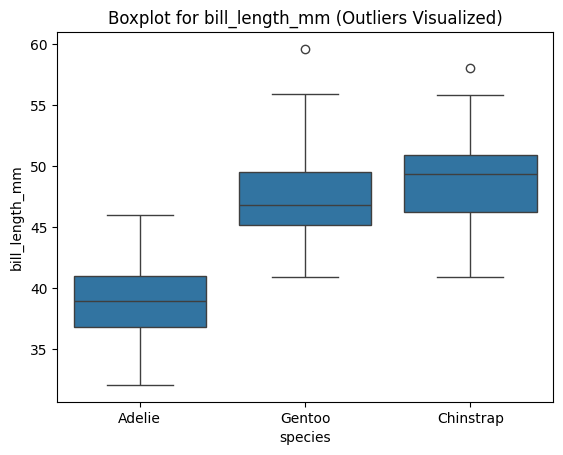

Outliers in bill_length_mm: 0


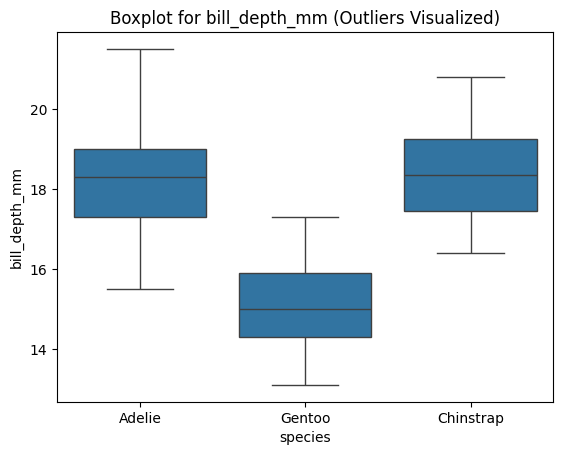

Outliers in bill_depth_mm: 0


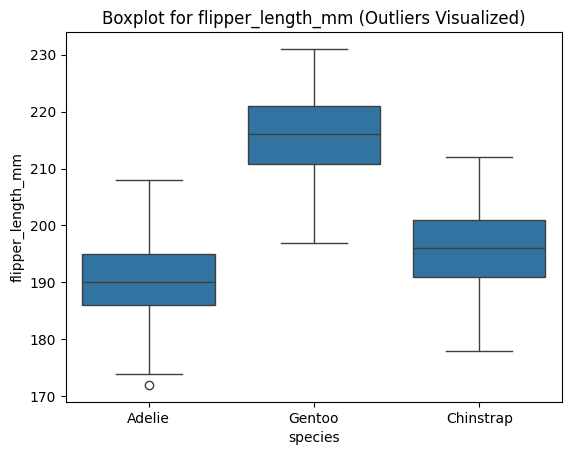

Outliers in flipper_length_mm: 0


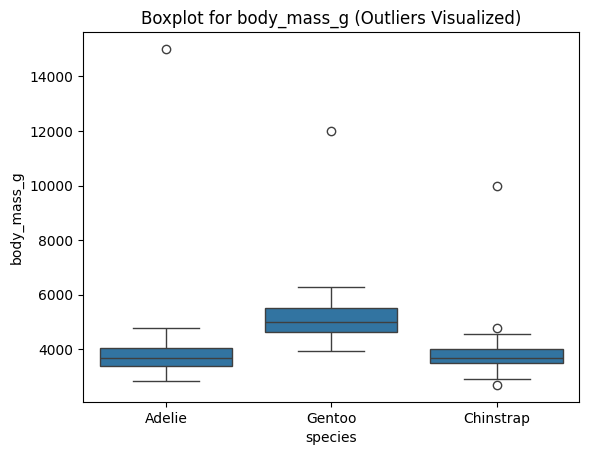

Outliers in body_mass_g: 3


In [15]:
#Visualizing the outliers
print("\nOutlier Detection:")
for col in num_columns:
    outliers = detect_outliers(df, col)
    sns.boxplot(x='species', y=col, data=df)
    plt.title(f"Boxplot for {col} (Outliers Visualized)")
    plt.show()
    print(f"Outliers in {col}: {len(outliers)}")

In [16]:
#performing PCA on the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num_columns])

pca = PCA()
pca_result = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_

print("\nPCA Results:")
print("Explained Variance Ratio:", explained_variance)
print("Cumulative Variance:", explained_variance.cumsum())


PCA Results:
Explained Variance Ratio: [0.61623511 0.19693481 0.13337583 0.05345426]
Cumulative Variance: [0.61623511 0.81316992 0.94654574 1.        ]


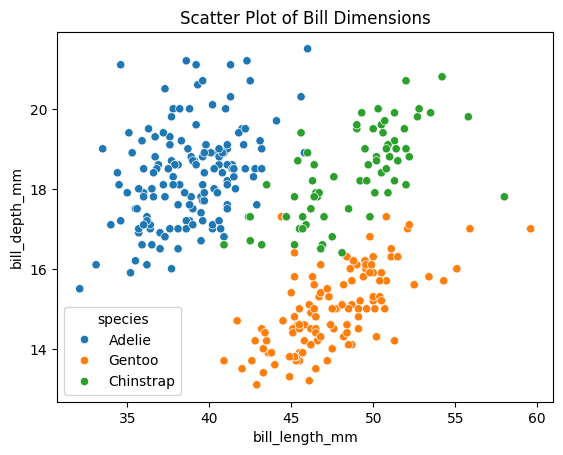

In [17]:
#bill_length_mm vs bill_depth_mm plots
#1 Scatter Plot
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df)
plt.title("Scatter Plot of Bill Dimensions")
plt.show()

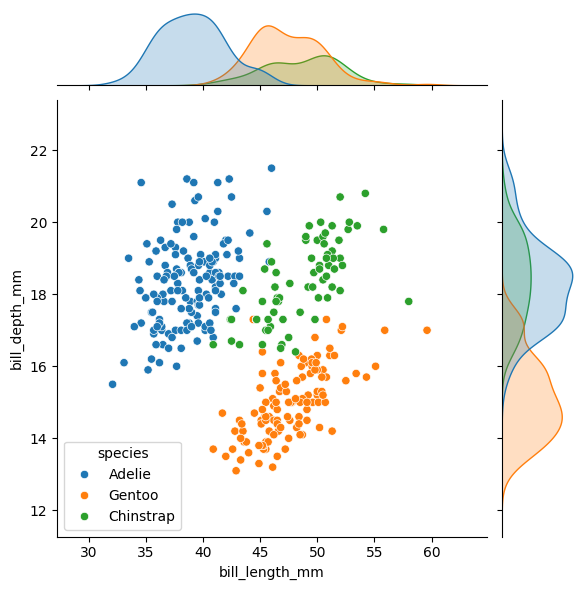

In [18]:
#2 Joint Plot
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df, hue='species')
plt.show()

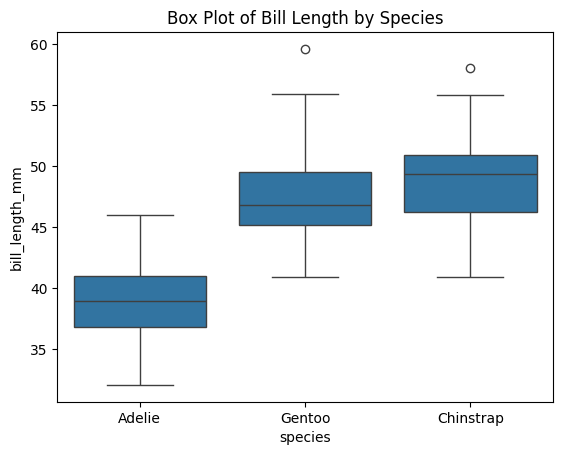

In [19]:
#3 Box Plot
sns.boxplot(x='species', y='bill_length_mm', data=df)
plt.title("Box Plot of Bill Length by Species")
plt.show()

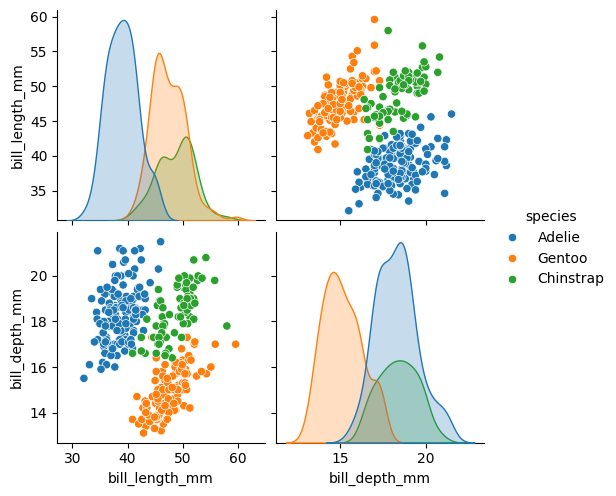

In [20]:
#4 Pair Plot
sns.pairplot(df, hue='species', vars=['bill_length_mm', 'bill_depth_mm'])
plt.show()

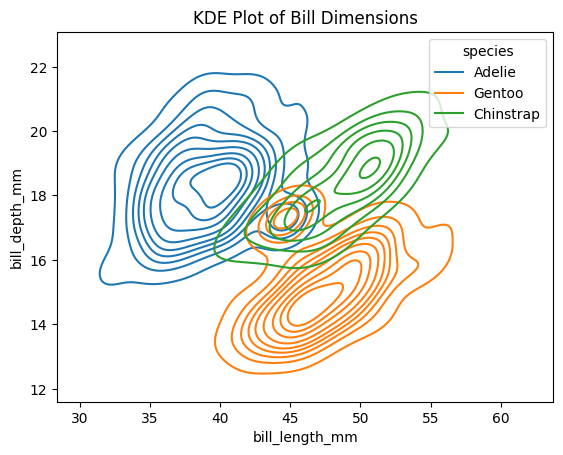

In [21]:
#5 KDE Plot
sns.kdeplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title("KDE Plot of Bill Dimensions")
plt.show()

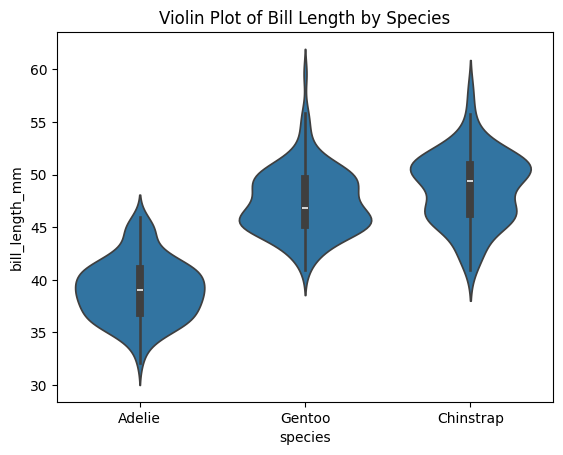

In [22]:
#6 violin Plot
sns.violinplot(x='species', y='bill_length_mm', data=df)
plt.title("Violin Plot of Bill Length by Species")
plt.show()

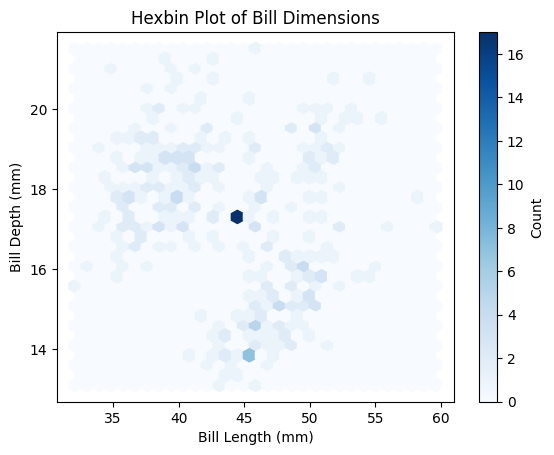

In [23]:
#7 Hexbin Plot
plt.hexbin(df['bill_length_mm'], df['bill_depth_mm'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title("Hexbin Plot of Bill Dimensions")
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

In [24]:
#Finding Maximum Flipper length by species and island
max_flipper_length = df.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()
longest_flippers = max_flipper_length.loc[max_flipper_length.groupby('island')['flipper_length_mm'].idxmax()]

In [25]:
#Displaying the maximum flipper length by species
print("\nMaximum Flipper Length for Each Species and Island:\n", max_flipper_length)


Maximum Flipper Length for Each Species and Island:
      species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              202.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0


In [26]:
#Displaying the maximum flipper length by island
print("\nSpecies with Longest Flippers on Each Island:\n", longest_flippers)


Species with Longest Flippers on Each Island:
      species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              202.0


In [27]:
#Performing Z-Score Normalization
scaler=StandardScaler()
dataset_normalized = df.copy()
dataset_normalized[num_columns] = scaler.fit_transform(df[num_columns])

In [28]:
#Displaying the normalized data
print("Normalized Dataset (First 5 Rows):")
print(dataset_normalized.head())

Normalized Dataset (First 5 Rows):
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.913444       0.794410          -1.432790   
1  Adelie  Torgersen       -0.838625       0.115785          -1.068611   
2  Adelie  Torgersen       -0.688985       0.428997          -0.413089   
3  Adelie  Torgersen        0.134034       0.063583          -0.267417   
4  Adelie  Torgersen       -1.362364       1.107622          -0.558760   

   body_mass_g     sex  
0    -0.466869    male  
1    -0.421648  female  
2    -0.919080  female  
3    -0.195542  female  
4    -0.738196  female  


In [29]:
#Displaying the mean and standard deviation after normalization
print("\nMean and Standard Deviation After Normalization:")
for col in num_columns:
    print(f"{col} -> Mean: {dataset_normalized[col].mean():.2f}, Std Dev: {dataset_normalized[col].std():.2f}")


Mean and Standard Deviation After Normalization:
bill_length_mm -> Mean: 0.00, Std Dev: 1.00
bill_depth_mm -> Mean: -0.00, Std Dev: 1.00
flipper_length_mm -> Mean: 0.00, Std Dev: 1.00
body_mass_g -> Mean: 0.00, Std Dev: 1.00


In [32]:
#Saving the processed final output in pickel file for future analysis
import pickle
file_path="C:\\Users\\chara\\Pictures\\RW assignment project\\randomwalk-ds-assessment-level2\\model.pkl"
with open(file_path,"wb") as file:
    pickle.dump(dataset_normalized,file)
    file.close()